<a href="https://colab.research.google.com/github/naufalDiraAgustian011/pembelajaran-mesin-naufal-2211533011/blob/main/Decision_tree_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# menggunakan numpy untuk penjumalahan aljabar
import numpy as np

# pandas untuk data pre-processing
import pandas as pd

# seaborn dan matplotlib untuk visualisasi data
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix

# Algoritma decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#membaca data dari csv
df=pd.read_csv("spam.csv")

#menampilkan tabel sebanyak 20 baris
df.head(20)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
#menampilkan informasi mengenai data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#membuat fungsi lambda untuk membuat label baru yang diberi nama spam, yang mana
#nilai catergory jika spam maka diberi nilai satu dan tidak spam diberi nilai 0
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)

#menampilkan tabel sebanyak 20 baris
df.head(20)

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [ ]:
#menentukan fitur dan target
X=df['Message']
Y=df['spam']

In [ ]:
#melakukan training pada data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

In [ ]:
#membuat klasifikasi menggunakan decision tree
clf_DecisionTree= Pipeline([
    ('vectorizer', CountVectorizer()),#mengkonversi teks menjadi representasi vektorberdasarkan frekuensi kata
    ('dt',DecisionTreeClassifier())#implementasi decision tree untuk klasifikasi
])

In [ ]:
#melatih model yang telah dibuat
clf_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [ ]:
#menghasilkan prediksi dari data model yang telah dilatih
y_pred_DT=clf_DecisionTree.predict(X_test)

In [ ]:
#memberikan gamabaran kinerja model dalam melakukan
#klasifikasi dengan membandingkan nilai aktual dan nilai prediksi
conf_mat_DT=confusion_matrix(y_test, y_pred_DT)

<Axes: >

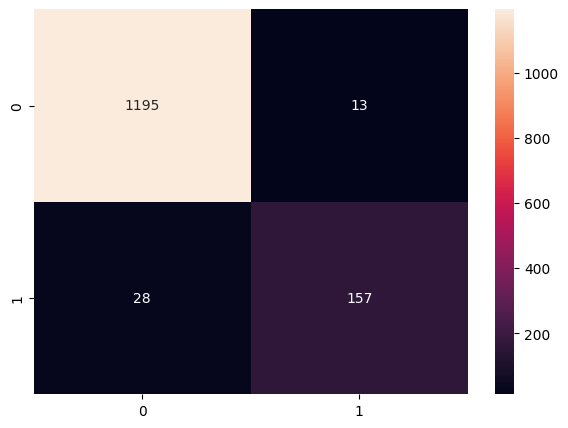

In [ ]:
#memvisualisasikan data menggunakan heatmap
plt.figure(figsize=(7,5))
sns.heatmap(conf_mat_DT,annot=True,fmt='d')

In [ ]:
#hasil tes akurasi
dt_acc=accuracy_score(y_test,y_pred_DT)
dt_acc

0.9705671213208902